In [1]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Data Class Proportions:
Normal: 600 OSCC: 600


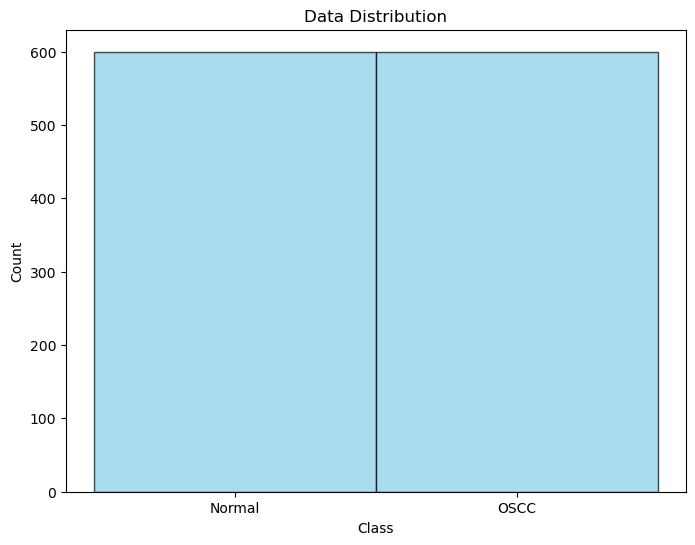

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define constants
data_path = r"C:\Users\koppa\Downloads\oral-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print class proportions
print("Data Class Proportions:")
print("Normal:", np.sum(all_labels == 0), "OSCC:", np.sum(all_labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Normal Images: (600, 224, 224)
OSCC Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


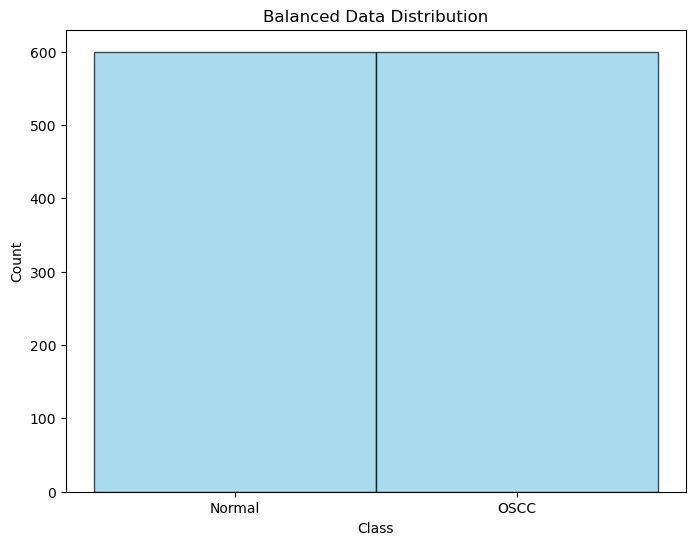

In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"C:\Users\koppa\Downloads\oral-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
        labels.append(0 if class_name == 'NORMAL' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = images[labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = images[labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = labels[labels == 0][:600]
oscc_labels = labels[labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Normal Images:", normal_images.shape)
print("OSCC Images:", oscc_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot histogram for the balanced class distribution
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data Distribution')
plt.show()


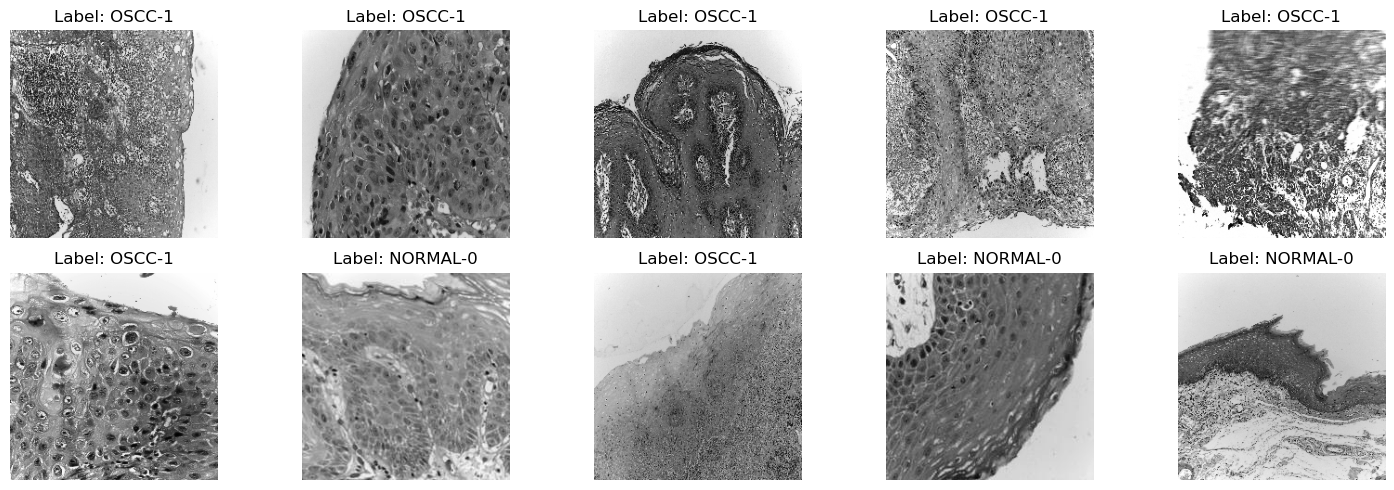

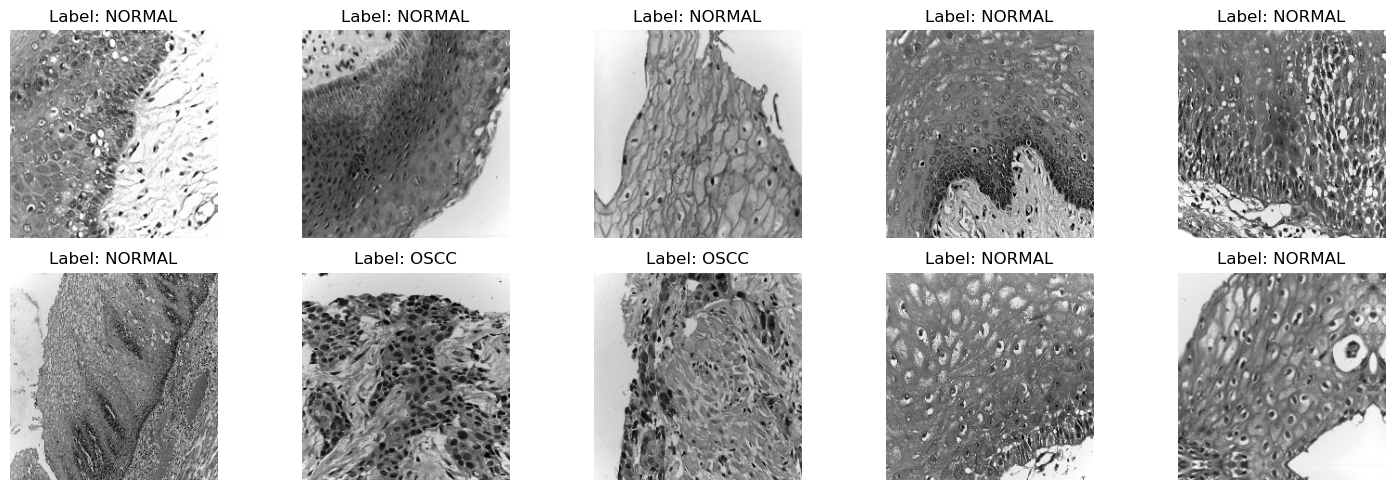

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL-0" or "OSCC-1"
    label_text = 'NORMAL-0' if label == 0 else 'OSCC-1'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL" or "OSCC"
    label_text = 'NORMAL' if label == 0 else 'OSCC'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [33]:
# import numpy as np
# import cv2
# import os
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# from keras.optimizers import Adam
# # from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping

# # Define constants
# data_path = r"C:\Users\koppa\Downloads\oral-dataset"  # Updated path
# target_size = (224, 224)  # Define the target size for resizing

# # Load and preprocess data
# images = []
# labels = []

# # Loop through each class (NORMAL and OSCC)
# for class_name in ['NORMAL', 'OSCC']:
#     class_path = os.path.join(data_path, class_name)
#     # Iterate through each image in the class
#     for image_name in os.listdir(class_path):
#         image_path = os.path.join(class_path, image_name)
#         # Read the image in grayscale
#         img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         # Resize the image to the target size
#         img = cv2.resize(img, target_size)
#         # Normalize the pixel values to the range [0, 1]
#         img = img.astype(np.float32) / 255.0
#         # Append the preprocessed image to the images list
#         images.append(img)
#         # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
#         labels.append(0 if class_name == 'NORMAL' else 1)

# # Convert images and labels to NumPy arrays
# images = np.array(images)
# labels = np.array(labels)

# # Ensure dataset is balanced by selecting 550 images from each class
# normal_images = images[labels == 0][:550]  # Select 550 images from NORMAL class
# oscc_images = images[labels == 1][:550]    # Select 550 images from OSCC class
# normal_labels = labels[labels == 0][:550]
# oscc_labels = labels[labels == 1][:550]

# # Concatenate the normal and OSCC images and labels to create a balanced dataset
# balanced_images = np.concatenate([normal_images, oscc_images])
# balanced_labels = np.concatenate([normal_labels, oscc_labels])

# # Shuffle the dataset to avoid any order bias
# shuffle_indices = np.random.permutation(len(balanced_images))
# balanced_images = balanced_images[shuffle_indices]
# balanced_labels = balanced_labels[shuffle_indices]

# # Split the balanced dataset into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(
#     balanced_images, balanced_labels, test_size=0.2, random_state=42
# )

# # Reshape images for Keras model (add channel dimension)
# X_train = X_train.reshape(-1, 224, 224, 1)
# X_test = X_test.reshape(-1, 224, 224, 1)

# # Simple Model (Underfitting scenario)
# model = Sequential()
# model.add(Flatten(input_shape=(224, 224, 1)))  # Input layer
# model.add(Dense(32, activation='relu'))  # Simple layer with fewer neurons
# model.add(Dense(1, activation='sigmoid'))  # Output layer

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Early stopping callback to stop training early if the validation loss doesn't improve
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(
#     X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping]
# )

# # Print the final evaluation on test data
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,605,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,605,697 (6.13 MB)

 Trainable params: 1,605,697 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5527 - loss: 4.4337 - val_accuracy: 0.5727 - val_loss: 1.2477
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5661 - loss: 1.2499 - val_accuracy: 0.5955 - val_loss: 0.9228
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5830 - loss: 1.3476 - val_accuracy: 0.5136 - val_loss: 1.6961
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6101 - loss: 1.1554 - val_accuracy: 0.4727 - val_loss: 1.8988
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6790 - loss: 0.7749 - val_accuracy: 0.6318 - val_loss: 0.7033
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7506 - loss: 0.5217 - val_accuracy: 0.6091 - val_loss: 0.8098
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7153 - loss: 0.6216 - val_accuracy: 0.4636 - val_loss: 3.2918
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6012 - loss: 1.2950 - val_accuracy: 0.6091 - v

In [49]:
# import numpy as np
# import cv2
# import os
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
# from keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping

# # Define constants
# data_path = r"C:\Users\koppa\Downloads\oral-dataset"  # Updated path
# target_size = (224, 224)  # Define the target size for resizing

# # Load and preprocess data
# images = []
# labels = []

# # Loop through each class (NORMAL and OSCC)
# for class_name in ['NORMAL', 'OSCC']:
#     class_path = os.path.join(data_path, class_name)
#     # Iterate through each image in the class
#     for image_name in os.listdir(class_path):
#         image_path = os.path.join(class_path, image_name)
#         # Read the image in grayscale
#         img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         # Resize the image to the target size
#         img = cv2.resize(img, target_size)
#         # Normalize the pixel values to the range [0, 1]
#         img = img.astype(np.float32) / 255.0
#         # Append the preprocessed image to the images list
#         images.append(img)
#         # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
#         labels.append(0 if class_name == 'NORMAL' else 1)

# # Convert images and labels to NumPy arrays
# images = np.array(images)
# labels = np.array(labels)

# # Ensure dataset is balanced by selecting 550 images from each class
# normal_images = images[labels == 0][:550]  # Select 550 images from NORMAL class
# oscc_images = images[labels == 1][:550]    # Select 550 images from OSCC class
# normal_labels = labels[labels == 0][:550]
# oscc_labels = labels[labels == 1][:550]

# # Concatenate the normal and OSCC images and labels to create a balanced dataset
# balanced_images = np.concatenate([normal_images, oscc_images])
# balanced_labels = np.concatenate([normal_labels, oscc_labels])

# # Shuffle the dataset to avoid any order bias
# shuffle_indices = np.random.permutation(len(balanced_images))
# balanced_images = balanced_images[shuffle_indices]
# balanced_labels = balanced_labels[shuffle_indices]

# # Split the balanced dataset into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(
#     balanced_images, balanced_labels, test_size=0.2, random_state=42
# )

# # Reshape images for Keras model (add channel dimension)
# X_train = X_train.reshape(-1, 224, 224, 1)
# X_test = X_test.reshape(-1, 224, 224, 1)

# # Underfitting Model (More underfitting scenario)
# model = Sequential()
# model.add(Flatten(input_shape=(224, 224, 1)))  # Input layer
# model.add(Dense(16, activation='relu'))  # Reduced number of neurons
# model.add(Dense(1, activation='sigmoid'))  # Output layer

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Early stopping callback to stop training early if the validation loss doesn't improve
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(
#     X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping]
# )

# # Print the final evaluation on test data
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc:.4f}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │         802,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 802,849 (3.06 MB)

 Trainable params: 802,849 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4940 - loss: 2.6131 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4904 - loss: 0.6932 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5150 - loss: 0.6931 - val_accuracy: 0.5045 - val_loss: 0.6931
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4721 - loss: 0.6933 - val_accuracy: 0.5045 - val_loss: 0.6931
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5030 - loss: 0.6931
Test Accuracy: 0.5045


Data Augmentation

<Figure size 1000x1000 with 0 Axes>

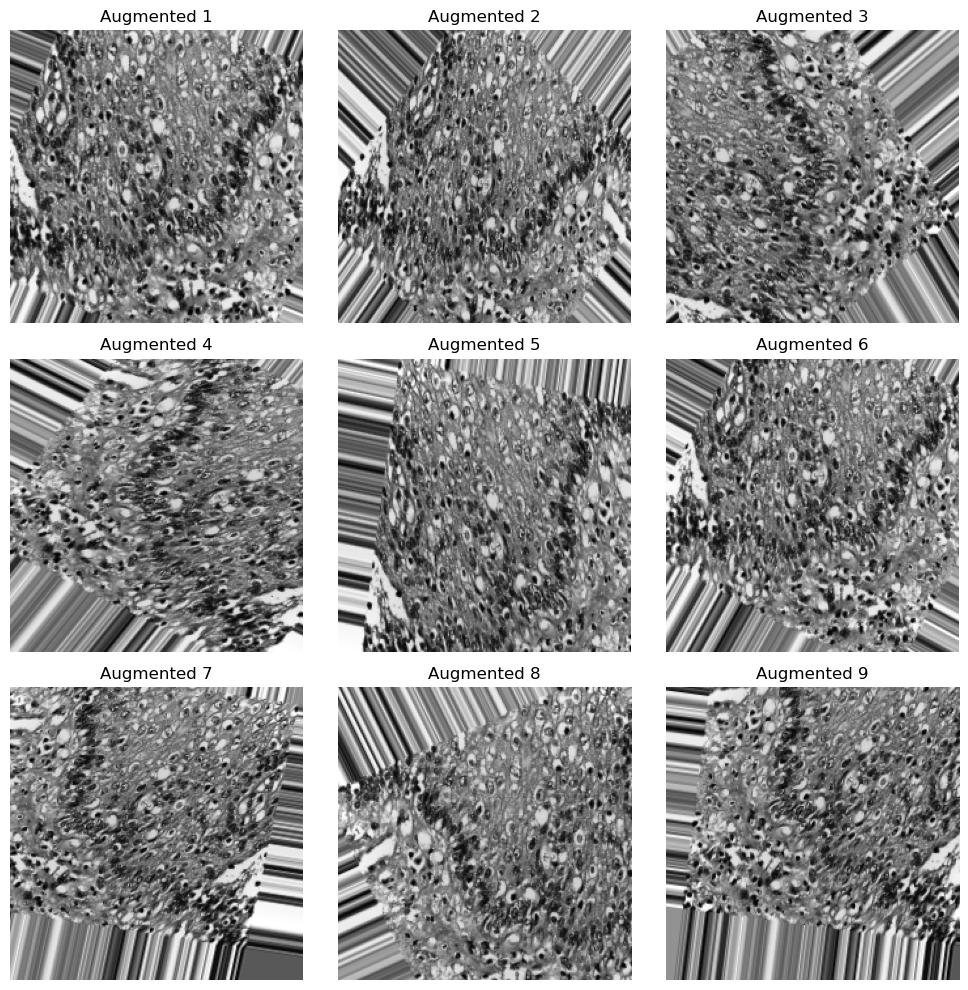

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random

# Create an ImageDataGenerator object with several augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,           # Random rotations
    width_shift_range=0.2,       # Random horizontal shifts
    height_shift_range=0.2,      # Random vertical shifts
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random horizontal flip
    fill_mode='nearest'          # Filling missing pixels after transformations
)

# Select a random image from the dataset for demonstration
image = balanced_images[random.choice(range(len(balanced_images)))]
image = np.expand_dims(image, axis=-1)  # Reshaping to (224, 224, 1)

# Add an extra dimension to match the expected input shape (1, 224, 224, 1)
image = np.expand_dims(image, axis=0)  # Shape is now (1, 224, 224, 1)

# Create a batch of augmented images
augmented_images = datagen.flow(image, batch_size=9)

# Plot the original image and its augmented versions
plt.figure(figsize=(10, 10))

# Loop through the augmented images and display them
for i in range(9):
    augmented_image = next(augmented_images)[0].astype(np.float32)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.title(f'Augmented {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


underfitting code

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Define the CNN model (simplified model for underfitting)
def create_underfit_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification (NORMAL vs OSCC)
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model on the augmented data with a small number of epochs (to induce underfitting)
def train_underfit_model():
    # Load the data and split it into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

    # Reshape the data to match the model input (224, 224, 1)
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    # Create the underfitting model
    model = create_underfit_model()

    # Train the model for only a few epochs (inducing underfitting)
    model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")

# Call the training function to simulate underfitting
train_underfit_model()


Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 610ms/step - accuracy: 0.5014 - loss: 3.4632 - val_accuracy: 0.7864 - val_loss: 0.6887
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 587ms/step - accuracy: 0.5745 - loss: 0.6861 - val_accuracy: 0.6864 - val_loss: 0.5943
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 577ms/step - accuracy: 0.7245 - loss: 0.5538 - val_accuracy: 0.7773 - val_loss: 0.4812
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7971 - loss: 0.4627
Test Loss: 0.48119157552719116
Test Accuracy: 0.7772727012634277


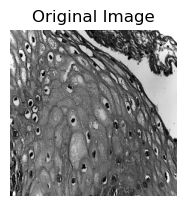

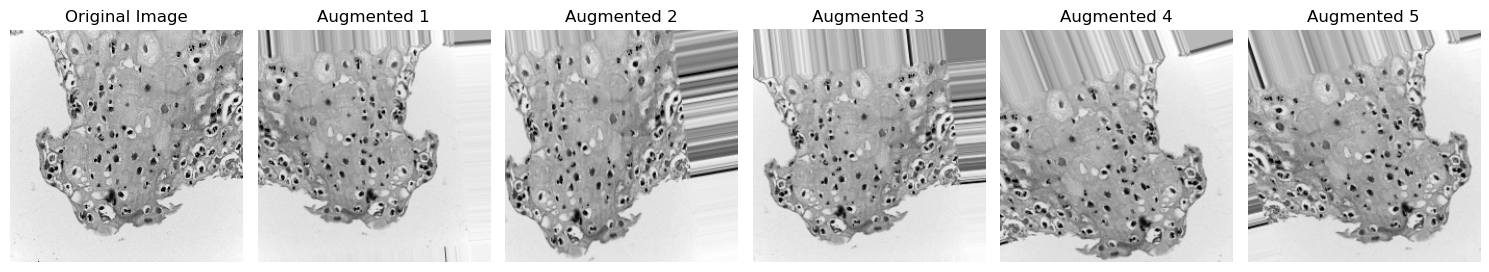

In [47]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the ImageDataGenerator for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,         # Random rotation between 0 and 20 degrees
#     width_shift_range=0.2,     # Randomly shift the image horizontally by 20%
#     height_shift_range=0.2,    # Randomly shift the image vertically by 20%
#     shear_range=0.2,           # Shear the image by a factor of 0.2
#     zoom_range=0.2,            # Randomly zoom the image by 20%
#     horizontal_flip=True,      # Randomly flip the image horizontally
#     fill_mode='nearest'        # Fill in missing pixels after transformations
# )

# # Example of applying augmentation to one image
# image_idx = random.randint(0, len(balanced_images) - 1)
# image = balanced_images[image_idx].reshape((1, *target_size, 1))  # Reshaping for a single image (add channel dimension)

# # Generate augmented images
# augmented_images = datagen.flow(image, batch_size=1)

# # Display the original image and a few augmented versions
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 6, 1)
# plt.imshow(image[0].reshape(target_size), cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# # Display 5 augmented images using next() method
# for i in range(5):
#     augmented_image = next(augmented_images)  # Correct way to fetch the next augmented image
#     plt.subplot(1, 6, i+2)
#     plt.imshow(augmented_image[0].reshape(target_size), cmap='gray')
#     plt.title(f'Augmented {i+1}')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


Based on the training logs and evaluation metrics you provided, this model appears to be underfitting.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5313 - auc_4: 0.5548 - auc_5: 0.5609 - false_negatives_2: 97.8276 - false_positives_2: 110.9310 - loss: 2.0641 - precision_2: 0.5651 - recall_2: 0.5520 - true_negatives_2: 122.8276 - true_positives_2: 146.2069 - val_accuracy: 0.5364 - val_auc_4: 0.8168 - val_auc_5: 0.8355 - val_false_negatives_2: 102.0000 - val_false_positives_2: 0.0000e+00 - val_loss: 1.0239 - val_precision_2: 1.0000 - val_recall_2: 0.0642 - val_true_negatives_2: 111.0000 - val_true_positives_2: 7.0000
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6432 - auc_4: 0.7142 - auc_5: 0.6997 - false_negatives_2: 88.0690 - false_positives_2: 72.6207 - loss: 0.7259 - precision_2: 0.6515 - recall_2: 0.5611 - true_negatives_2: 169.7241 - true_positives_2: 147.3793 - val_accuracy: 0.8045 - val_auc_4: 0.8725 - val_auc_5: 0.8451 - val_false_negatives_2: 11.0000 - val_false_positives_2: 32.0000 - val_loss: 0.4763 - val_precision_2: 0.7538 - val_recall_2

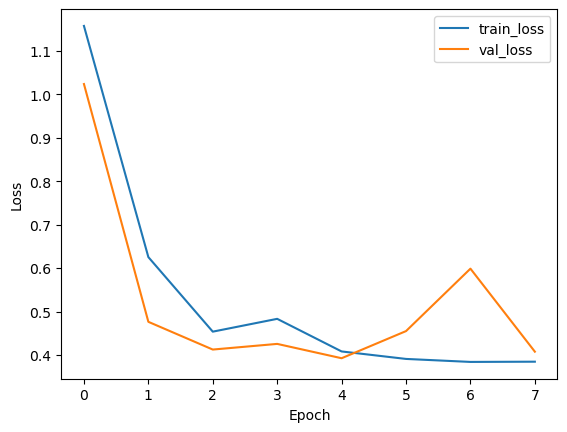

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.8373 - auc_4: 0.9259 - auc_5: 0.9232 - false_negatives_2: 4.6250 - false_positives_2: 19.0000 - loss: 0.3656 - precision_2: 0.7798 - recall_2: 0.9399 - true_negatives_2: 50.0000 - true_positives_2: 65.3750
Test Accuracy: 81.36%
Precision: 0.75
Recall: 0.94
AUC-ROC: 0.90
AUC-PR: 0.90
TN: 77.0, FP: 34.0, FN: 7.0, TP: 102.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step
Confusion Matrix:
[[ 77  34]
 [  7 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       111
           1       0.75      0.94      0.83       109

    accuracy                           0.81       220
   macro avg       0.83      0.81      0.81       220
weighted avg       0.83      0.81      0.81       220

AUC Score: 0.81
Precision: 0.75
Recall: 0.94
F1 Score: 0.83
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.65
Balanced Accuracy: 0.81
Time taken: 279.23 s

In [59]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")